## Banking Data Classification

In [2]:
# Libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [3]:
# Load train and test datasets
train = pd.read_csv('datasets/new_train.csv')
test = pd.read_csv('datasets/new_test.csv')

In [4]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [5]:
# Check statistics
train.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [6]:
# Check whether train datasets has null value
train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [7]:
# Check whehter columns have 'unknown' or not
unknown_counts = train.isin(['unknown']).sum()
unknown_counts

age               0
job             265
marital          65
education      1397
default        6940
housing         796
loan            796
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

## Check unknown values by column name

In [8]:
train['job'].value_counts()

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

In [9]:
train['marital'].value_counts()

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

In [10]:
train['education'].value_counts()

university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64

In [11]:
train['default'].value_counts()

no         26007
unknown     6940
yes            3
Name: default, dtype: int64

In [12]:
train['housing'].value_counts()

yes        17254
no         14900
unknown      796
Name: housing, dtype: int64

In [13]:
train['loan'].value_counts()

no         27131
yes         5023
unknown      796
Name: loan, dtype: int64

### Check null values using countplots

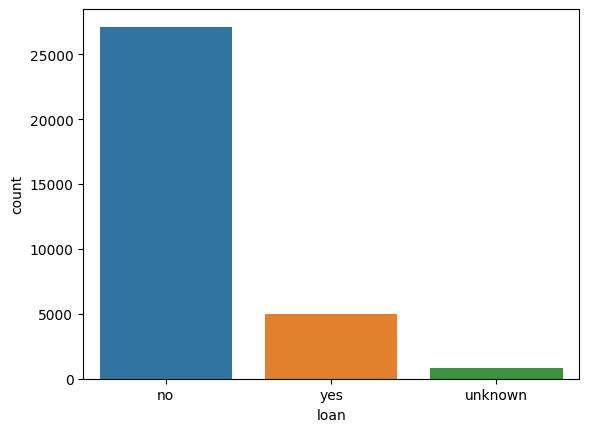

In [14]:
# Create the countplot
sns.countplot(x=train['loan'])
# Show the plot
plt.show()

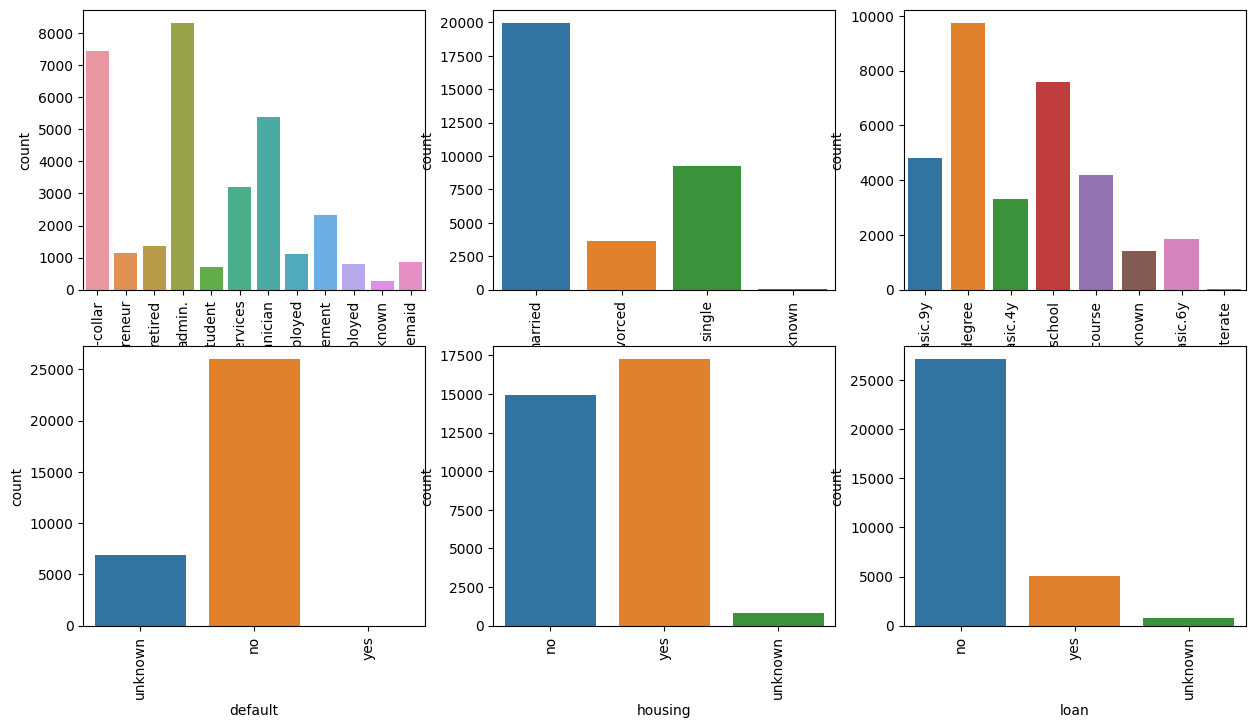

In [71]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.countplot(x=train['job'])
plt.xticks(rotation=90)

plt.subplot(2,3,2)
sns.countplot(x=train['marital'])
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x=train['education'])
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x=train['default'])
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x=train['housing'])
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x=train['loan'])
plt.xticks(rotation=90)

plt.show()